In [1]:
import numpy as np
from scipy.signal import chirp
from plot import plot_filterbank_and_cepstrum, plot_spectrogram
from filter import mel_filterbank
from compute.spectrotemporal import cepstral_coefficients, spectrogram
from handle import read_wav

In [21]:
n_filters = 50
n_fft = 512
n_ceps = 32

f1 = 300
f2 = 1400
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

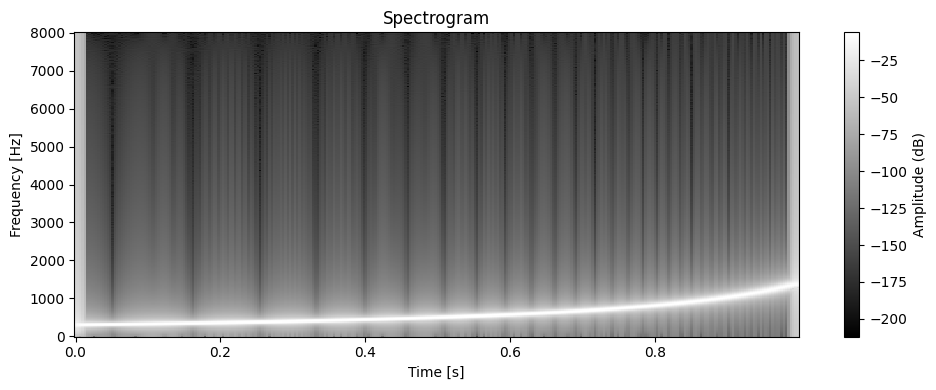

In [22]:
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=512, overlap=0.9)
plot_spectrogram(Sx, t, f, cmap='grey')

In [4]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/GT00742_10_Boris_contact.wav")
print(signal_)

Signal(data=array([-0.00012207, -0.00094607, -0.001648  , ..., -0.00701926,
       -0.00747703, -0.00817896], shape=(5771,), dtype=float32), n_channels=1, sr=44100, quantization='float32')


/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/handle.py:93: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(filepath)


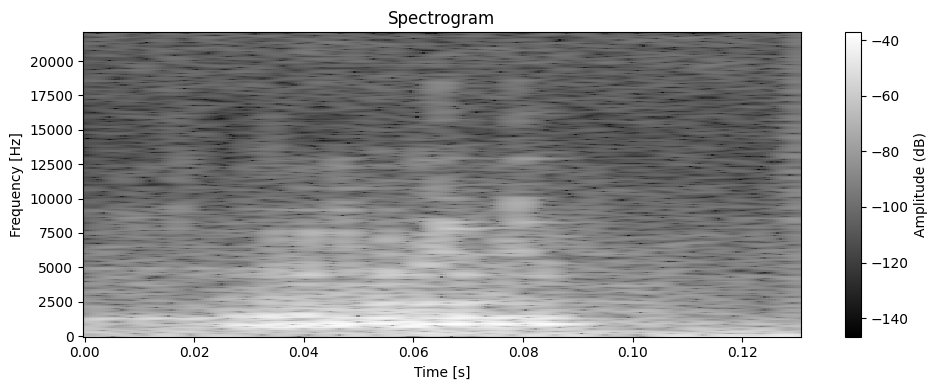

In [5]:
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=512, overlap=0.95)
plot_spectrogram(Sx, t, f, cmap='grey')

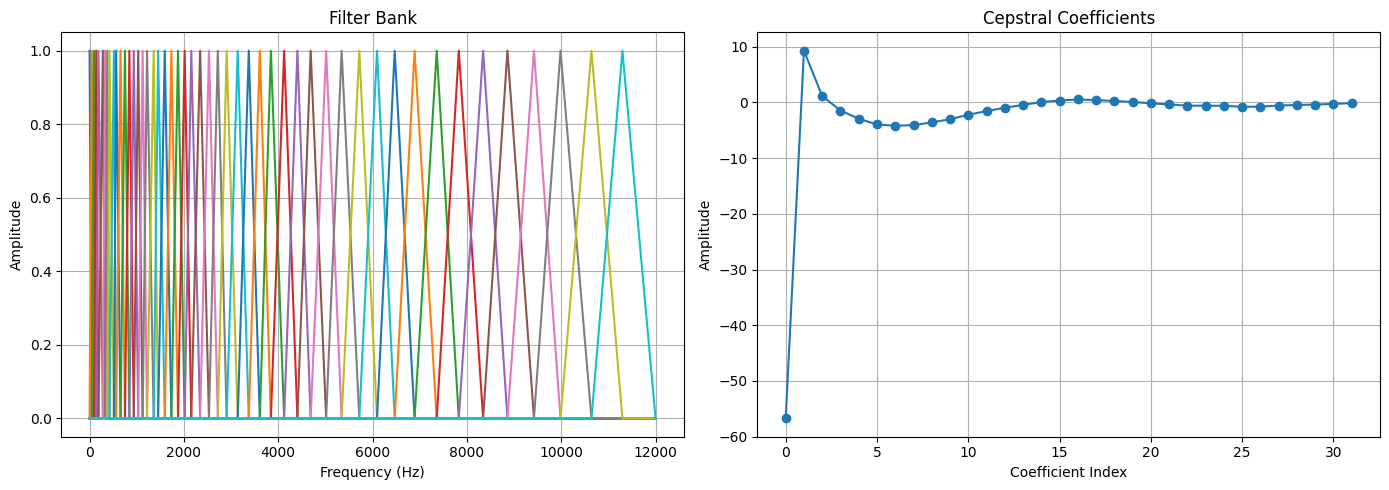

In [6]:
fbanks = mel_filterbank(n_filters, n_fft, sr)
ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)
plot_filterbank_and_cepstrum(
        fbanks, 
        sr, 
        n_fft, 
        ceps, 
        fmax=None, 
        title_prefix="")